In [37]:
%run ../setup_notebook.ipynb

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
# notebook specific imports
from utils import cacher
import pickle
from termcolor import cprint
from subsets_analysis import Subsets

In [39]:
pkl_path = os.path.join(path_to_vape, 'run_pkls')
if not os.path.exists(pkl_path):
    os.mkdir(pkl_path)

In [40]:
pkl_path

'/home/clean_python/code/Vape/run_pkls'

In [32]:
mouse_id = 'RL070'
run_numbers = [22,23,24,27,28,29]
run_numbers = [28,29]
run_numbers = [26]
for run_number in run_numbers:
    cprint('\n\nRun Number {}\n'.format(run_number), attrs=['bold'])
    
    cacher.main(mouse_id, run_number, pkl_path,   
                reprocess=True, reload=True, do_s2p=False, do_flu_preprocess=False)



Run Number 26


Error for run number 26

Traceback (most recent call last):
  File "/home/clean_python/code/Vape/utils/cacher.py", line 53, in run_processor
    run.get_object_and_test(run_number, raise_error = True)
  File "/home/clean_python/code/Vape/utils/opto_stim_import2.py", line 413, in get_object_and_test
    run_idx = self.pycontrol_folders.index(self.run_pycontrol_txt)
ValueError: 'NONE' is not in list





Run Number 23

/home/jrowland/mnt/qnap/Data/2020-02-27
['/home/jrowland/mnt/qnap/Data/2020-02-27/blimp/2020-02-27-203024']
['/home/jrowland/mnt/qnap/Data/2020-02-26/naparm/2020-02-26_RL072_NAPARM_001']
['/home/jrowland/mnt/qnap/Data/2020-02-27/RL072-2020-02-27-204825.txt', '/home/jrowland/mnt/qnap/Data/2020-02-27/2020-02-27_RL072_t002.paq', '/home/jrowland/mnt/qnap/Data/2020-02-27/RL072-2020-02-27-203753.txt']
['/home/jrowland/mnt/qnap/Data/2020-02-27/2020-02-27_RL072_t-002']
['/home/jrowland/mnt/qnap/Data/2020-02-27/2020-02-27_RL072_t-003']
['/home/jrowland/mnt/qnap/Data/2020-02-27/2020-02-27_RL072_t-004']
['/home/jrowland/mnt/qnap/Data/2020-02-27/2020-02-27_RL072_t-005']
['/home/jrowland/mnt/qnap/Data/2020-02-27/2020-02-27_RL072_t-006']
['/home/jrowland/mnt/qnap/Data/2020-02-27/2020-02-27_RL072_t-007']
['/home/jrowland/mnt/qnap/Data/2020-02-27/2020-02-27_RL072_t-008']
['/home/jrowland/mnt/qnap/Data/2020-02-27/2020-02-27_RL072_t-009']
['/home/jrowland/mnt/qnap/Data/2020-02-27/2020-0

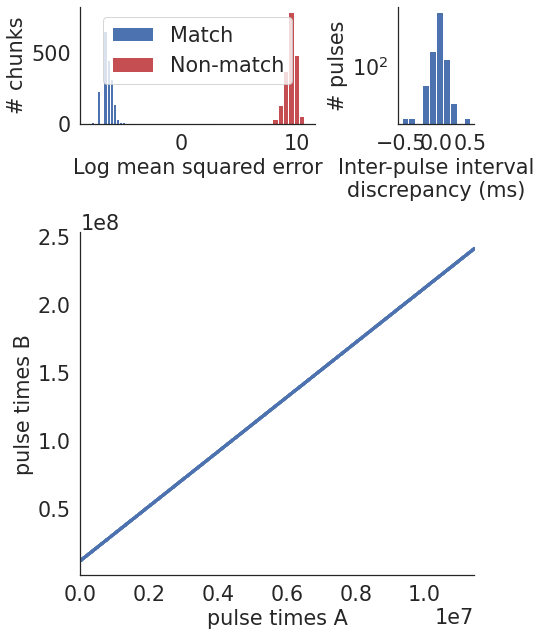

In [69]:
mouse_id = 'RL072'
run_numbers = [19,20,21,22,24]
run_numbers = [20,21,22]
run_numbers = [23]
for run_number in run_numbers:
    cprint('\n\nRun Number {}\n'.format(run_number), attrs=['bold'])
    
    cacher.main(mouse_id, run_number, pkl_path,   
                reprocess=True, reload=True, do_s2p=False, do_flu_preprocess=False)

### Quickly eyeball the behaviour so you don't have to suite2p bad behaviour. 
### Requires cacher.main to have been run. But you can set do_s2p = False

In [70]:
def load_run(mouse, run_number, pkl_path):
    run_path = os.path.join(pkl_path, mouse, f'run{run_number}.pkl')
    with open(run_path, 'rb') as f:
        run = pickle.load(f)
    return run

In [74]:
mouse = 'RL072'
run_number = 24

pkl_path = '/home/jrowland/mnt/qnap/run_pkls'
run = load_run(mouse, run_number, pkl_path)

In [75]:
def get_subset_dprime(run):
    
    trial_subsets = Subsets(run).trial_subsets
    assert trial_subsets.shape == run.outcome.shape
    
    fp_rate = sum(run.outcome=='fp') / (sum(run.outcome=='fp') + sum(run.outcome=='cr'))
    subset_dprimes = []
    for subset in [[5],[10],[20],[30],[40],[50], [150]]:
        idx = np.isin(trial_subsets, subset)
        outcome = run.outcome[idx]
        hit_rate = sum(outcome=='hit') / (sum(outcome=='hit') + sum(outcome=='miss'))
        subset_dprimes.append(utils.d_prime(hit_rate, fp_rate)) 
    return subset_dprimes

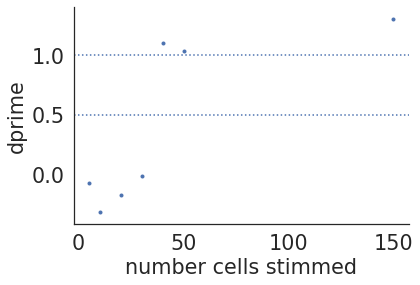

In [76]:
subset_dprimes = get_subset_dprime(run)
plt.plot([5,10,20,30,40,50,150], subset_dprimes, '.')
plt.xlabel("number cells stimmed")
plt.ylabel('dprime')
plt.ylim(min(subset_dprimes)-0.1, max(subset_dprimes)+0.1)

plt.axhline(0.5, linestyle=':')
plt.axhline(1, linestyle=':')
